# To Determine whether the fairway percentage from Aaron Baddeley is significantly different than Ben Crane using an *independent t-test*

*First, as always, you will import packages.  You will need all the same ones as before, but with the addition of importing ttest_ind from scipy.stats and removing norm, which was for single sample work*

## Import Packages

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

*Then you will need to import your data. You will be working with the PGA data again, but this time, you will need to wrangle it some to be able to run an independent sample t-test comparing two different golfers.*

## Import Data

In [3]:
golf = pd.read_csv('../data/pgaTourData.csv')

In [4]:
golf.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


*Next, you will need to test for the assumption of normality. Again, this can be done with the simple histogram command in Pandas, but since you are comparing certain values from a column with each other, it gets a little more complex. It is even more complex because you have spaces in your column names. But you'll take it step by step and it will get explained along the way.* 

*First, specify the dataframe name, golf.  Then put the column of interest that contains your dependent variable, or the mean you are comparing, in brackets and single quotes.  Then follow this immediately with another set of square brackets. In here, you'll specify the data frame name and the column name of your independent variable (the categories you are comparing), using the same format as you did for the previous variable - data frame name followed by the column name in brackets and quotes because there's a space in the name.  Then you can put that equal to the value you're interested in.  In this case, the first player you want to examine is Aaron Baddeley, so put his name in there.  Then follow all this up with the simple command .hist().*

## Test Assumptions

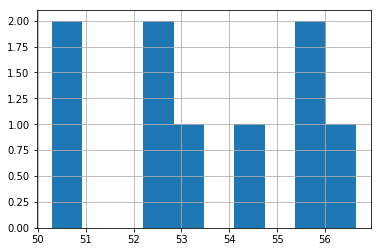

In [6]:
golf['Fairway Percentage'][golf['Player Name'] == 'Aaron Baddeley'].hist()

*Alright. Now that you've done that for the first player, you need to find out whether the second player is normally distributed.  These need to be done separately because if you mixed them all up, it wouldn't represent the test properly.*

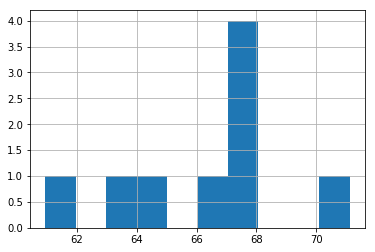

In [7]:
golf['Fairway Percentage'][golf['Player Name'] == 'Ben Crane'].hist()

*Now, even though neither of these are normally distributed, you will proceed with the analysis for now, because you will learn how to make things more normally distributed later on.  So it is time to run your analysis!*

*The set up for this is the same as what you did for your histograms, once you input the function name of ttest_ind() in. Feel free to just copy and paste if you like! But each player info will be separated by a comma; this indicates to Python that you are comparing them to each other.*

In [8]:
ttest_ind(golf['Fairway Percentage'][golf['Player Name'] == 'Aaron Baddeley'], golf['Fairway Percentage'][golf['Player Name'] == 'Ben Crane'])

Ttest_indResult(statistic=nan, pvalue=nan)

*And another beautiful NaN result! Don't panic, this just means you have missing data and need to run the .dropna() function. Make sure you go ahead and input this info up higher, before your assumption testing in a section marked data wrangling*

## Data Wrangling

### Removing Missing Values

In [13]:
golf.dropna(inplace=True)

*Remember that it takes the inplace=True argument to make this a permanent change*

*Now you are ready to run the independent t-test again.*

In [21]:
ttest_ind(golf['Fairway Percentage'][golf['Player Name'] == 'Aaron Baddeley'], golf['Fairway Percentage'][golf['Player Name'] == 'Ben Crane'])

Ttest_indResult(statistic=-5.582060540425933, pvalue=0.030626347812316216)

*Right, so this time, you find that there is a significant difference between these two players, since the p value is less than .05.  But who had a better fairway percentage? The only way you'll find that out is by looking at their means.*

*You can examine means by copying the coode from your last analysis specificying that you want the fairway percentages for each player and then adding the .mean() function to the end.*

In [22]:
golf['Fairway Percentage'][golf['Player Name'] == 'Aaron Baddeley'].mean()

55.545

In [23]:
golf['Fairway Percentage'][golf['Player Name'] == 'Ben Crane'].mean()

68.765

*Looks like Ben Crane had a much higher fairway percentage than Aaron Baddeley.* 